In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load the database
df = pd.read_csv("steam-200k.csv")
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [2]:
# rename the columns
cols = {'151603712':'user_id','The Elder Scrolls V Skyrim':'game_name','purchase':'status','1.0':'Hourplayed'}
df.rename(columns = cols,inplace =True)
df.head()

,user_id,game_name,status,Hourplayed,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [3]:
# drop unnecessary columns
df.drop(columns = ['0'], inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(199292, 4)

In [5]:
df.head()

,user_id,game_name,status,Hourplayed
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


<AxesSubplot:title={'center':'Most Played and Purchased Games'}>

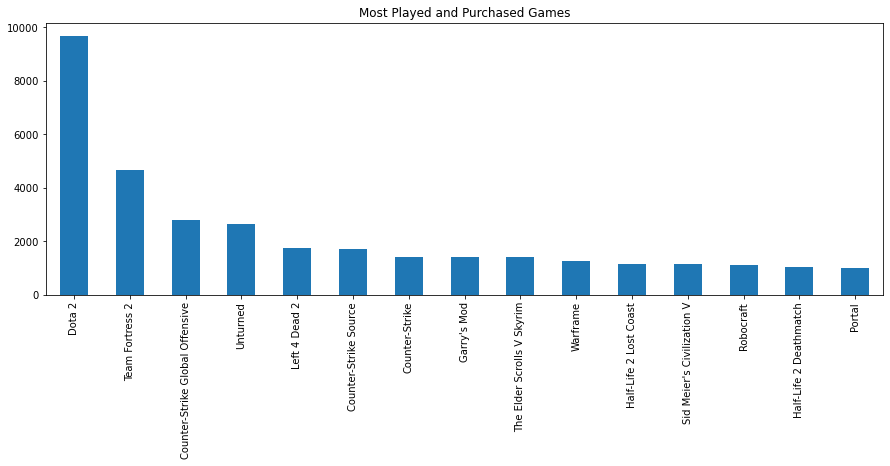

In [6]:
# plotting the top 15 games:
df['game_name'].value_counts().head(15).plot(kind = 'bar',figsize =(15,5), title = "Most Played and Purchased Games")

In [7]:
# from this we get id of player who had played a game for more than or equal to 2 hours
df= df[(df['Hourplayed']>=2) & (df['status']=='play')]

df = df[df.groupby('game_name').user_id.transform(len)>=20]

df['user_id'] = df['user_id'].astype(str)

average = df.groupby(['game_name'],as_index = False).Hourplayed.mean()

average['avg_hourplayed'] = average['Hourplayed']
average.drop(columns ='Hourplayed',inplace = True )
average.sort_values(by=['avg_hourplayed'], ascending=False)
average.head()
#average.plot.scatter(x="game_name", y="avg_hourplayed")

,game_name,avg_hourplayed
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982812
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674


In [8]:
# changing avg_hourplayed into ratings
df = df.merge(average,on = 'game_name')

condition = [
    df['Hourplayed']>= (0.8*df['avg_hourplayed']),
   (df['Hourplayed']>=0.6*df['avg_hourplayed'])&(df['Hourplayed']<0.8*df['avg_hourplayed']),
   (df['Hourplayed']>=0.4*df['avg_hourplayed'])&(df['Hourplayed']<0.6*df['avg_hourplayed']),
   (df['Hourplayed']>=0.2*df['avg_hourplayed'])&(df['Hourplayed']<0.4*df['avg_hourplayed']),
    df['Hourplayed']>=0
    
]
values = [5,4,3,2,1]
df['rating'] = np.select(condition,values)

df.head()

,user_id,game_name,status,Hourplayed,avg_hourplayed,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5


In [9]:
# keeping necessary data and removing redundant columns
df.drop(columns = ['status', 'Hourplayed', 'avg_hourplayed'], inplace=True)
df.head()

,user_id,game_name,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5


In [10]:
# 
pv = df.pivot_table(index=['user_id'],columns=['game_name'],values = 'rating')

pv = pv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)

pv = pv.fillna(0)
pv = pv.T
pv = pv.loc[:,(pv != 0).any(axis=0)]

pv.head()

user_id,100057229,100096071,100311267,100322840,100351493,100359523,100431715,100444456,100519466,100630947,...,994489,9946133,99484728,99640715,99704390,99711581,99713453,99723205,99766416,99802512
game_name,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
APB Reloaded,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,-0.475,-0.166667,0.0,0.0,0.0,0.0
ARK Survival Evolved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
Ace of Spades,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0
AdVenture Capitalist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0


In [11]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Collaborative Filtering using KNN
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(algorithm='brute',leaf_size=30,metric='cosine',metric_params=None,n_jobs=-1,n_neighbors=20,p=2,radius=1)
knn.fit(pv)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20,
                 radius=1)

In [13]:
qury_game = 'Ace of Spades' # input the game name

for i in range(431):
    if pv.index[i] == qury_game:
        qury = i
        break


# chooses a game at random
#qury = np.random.choice(pv.shape[0])
#print("The Choosen Game = ", pv.index[qury], qury)


In [14]:
# compute neighbor based on Euclidian distance
# calculates at most 6 nearest neighbors
distance , indices = knn.kneighbors(pv.iloc[qury,:].values.reshape(1,-1),n_neighbors=6)

G:\Jupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [15]:
avg_accuracy = 0
for i in range(0,len(distance.flatten())):
    if i == 0:
        print('Recommendation for {0} \n'.format(pv.index[qury]))
    else:
        print('{0} : {1} with distance of {2}'.format(i,pv.index[indices.flatten()[i]], distance.flatten()[i]))
        avg_accuracy += (distance.flatten()[i] * 100)

print("\nAverage accuracy of the current preditions : {0}%".format(int(avg_accuracy/5)))

Recommendation for Ace of Spades 

1 : Gunpoint with distance of 0.8928375612495304
2 : Resident Evil 5 / Biohazard 5 with distance of 0.8979549364083482
3 : Poker Night at the Inventory with distance of 0.9059883521082859
4 : Mirror's Edge with distance of 0.922958988643649
5 : Just Cause 2 Multiplayer Mod with distance of 0.923276994403466

Average accuracy of the current preditions : 90%
